# ATTENTION
##### Les images affichées ou la boucle for pour choisir et obtenir le meilleur K peuvent prendre du temps à s'exécuter ! le programme met environ 200 secondes à s'exécuter pour avoir toutes les données en temps réel. 


#### En cas d'erreur lors du chargement du fichier txt. Ouvrir le lien du fichier dans le navigateur et cliquez sur 'autoriser' pour charger le fichier .txt

# Extraction des données

## 1- Importation des modules de base

In [1]:
import pandas as pd
import numpy as np

## 2- Importation de modules spécifiques pour l'affichage

In [2]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

## 3- Importation du jeu de données

On récupère le fichier 'data.txt' et on créé le dataframe correspondant avec Pandas

In [3]:
df = pd.read_csv('http://2.11.7.149/ressources/dia/knn/data.txt', sep=";", header=None)
df.columns = ["a", "b", "c", "d", "e", "f", "g", "h", "i" ,"j","Classe"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       1000 non-null   float64
 1   b       1000 non-null   float64
 2   c       1000 non-null   float64
 3   d       1000 non-null   float64
 4   e       1000 non-null   float64
 5   f       1000 non-null   float64
 6   g       1000 non-null   float64
 7   h       1000 non-null   float64
 8   i       1000 non-null   float64
 9   j       1000 non-null   float64
 10  Classe  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


On récupère de la même manière le 2ème jeu de données

In [5]:
df2 = pd.read_csv('http://2.11.7.149/ressources/dia/knn/preTest.txt', sep=";", header=None)
df2.columns = ["a", "b", "c", "d", "e", "f", "g", "h", "i" ,"j","Classe"]

## 4-Concaténation des données

Les deux dataframe étant constitués des mêmes colonnes, on va les fusionner pour augmenter la taille de notre dataset finale

In [6]:
df = pd.concat([df,df2] , ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       1500 non-null   float64
 1   b       1500 non-null   float64
 2   c       1500 non-null   float64
 3   d       1500 non-null   float64
 4   e       1500 non-null   float64
 5   f       1500 non-null   float64
 6   g       1500 non-null   float64
 7   h       1500 non-null   float64
 8   i       1500 non-null   float64
 9   j       1500 non-null   float64
 10  Classe  1500 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 129.0 KB


# Opération sur les données

On créé 2 nouveaux dataframes comprenant distinctement les données labellisées comme '0' et l'autre les données avec le label '1'

In [8]:
df_class0 = df[df['Classe']== 0 ]
df_class1 = df[df['Classe']== 1 ]

<AxesSubplot:xlabel='Classe', ylabel='count'>

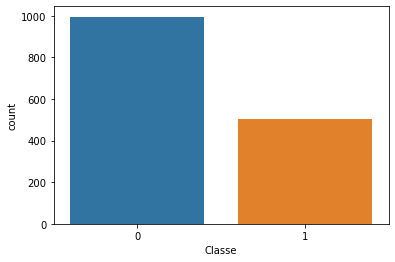

In [9]:
sns.countplot(x='Classe',data=df,label="Nombre")
# Permet d'afficher la répartition des individus de classe 0 et 1 dans le dataset

On affiche le nombre d'individus de Classe '0' et de Classe '1' à titre informatif

In [10]:
print("objet classifiés en tant que '0': ",len(df_class0))
print("objet classifiés en tant que '1': ",len(df_class1))

objet classifiés en tant que '0':  996
objet classifiés en tant que '1':  504


## 1- Scaling (Normalisation) du jeu de données

Afin que l'algorithme prenne en compte les poids de toutes les variables et pas seulement ceux des variables ayant un ordre de grandeur plus grand que les autres, on va normaliser nos données.

#### Fonction de Min Max Scaling pour normaliser les données du dataset
$$X=\frac{X - Xmin}{Xmax - Xmin}$$

Avec 'X' qui correspond à la variable normalisée (une colonne du Dataframe)

In [11]:
def min_max_scaling(x,min_x,max_x):
    return (x-min_x) / (max_x - min_x)

On applique cette fonction à toutes nos colonnes (sauf la colonne indiquant la classe de l'individu) :

In [12]:
def normalization(dataframe):
    for column in dataframe:
        if column != "Classe":
            X_min = df[column].min()
            X_max = df[column].max()
            diff = X_max - X_min
            df[column] = df[column].apply(lambda x : min_max_scaling(x, X_min, X_max))

In [13]:
normalization(df)

##  2-Création des dataset

On va sélectionner aléatoirement 60% d'individus de Classe '0' et 60% d'indivus de Classe '1' pour créer notre Learning dataset. 
Les individus restants permettront de vérifier nos données et de calculer la précision du modèle.

In [14]:
learning_df = pd.concat([df_class0.sample(frac=0.6),df_class1.sample(frac=0.6)] , ignore_index=True)
test_df = df.drop(learning_df.index)
test_dataset = test_df.values.tolist()

## 3-Affichage de la matrice de corrélation :

On affiche la matrice de corrélation entre les différentes variables pour voir leur importance sur la classe d'un individu :

In [15]:
def plot_correlation(data):
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('correlation.png')

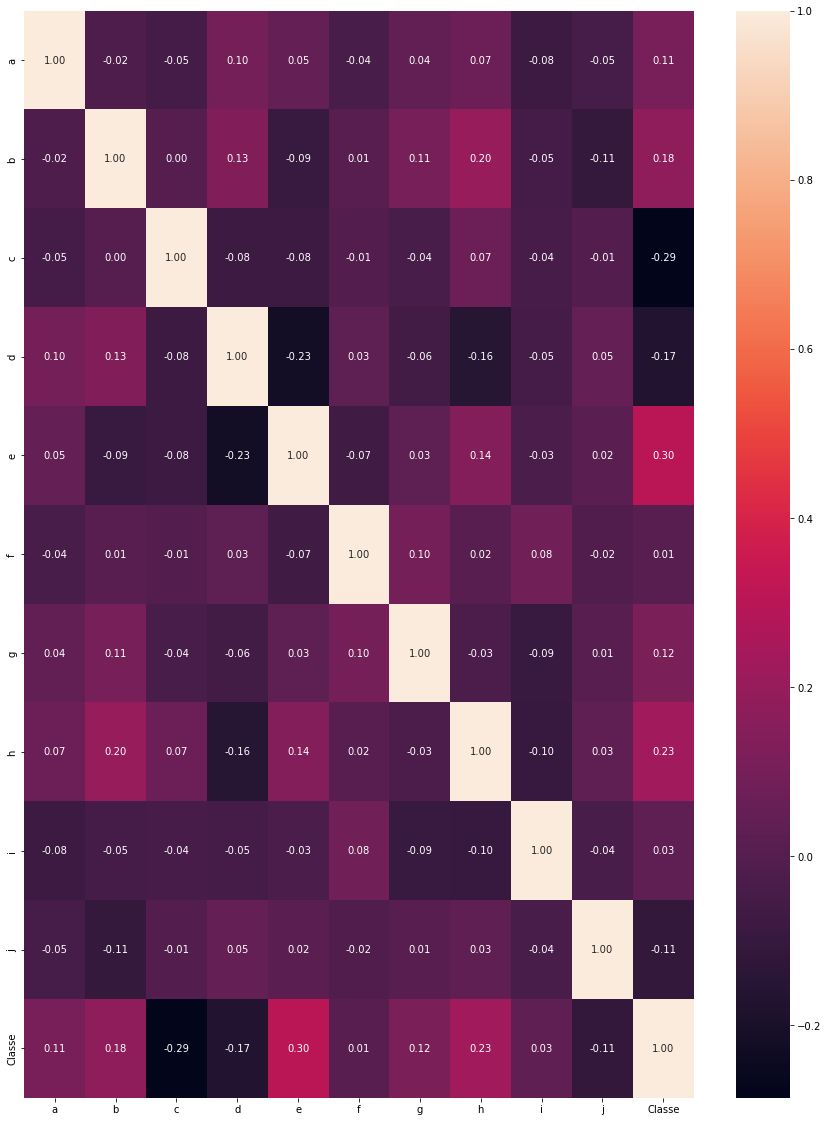

In [16]:
plot_correlation(df)

On peut voir qu'aucune variable ne dépasse une couefficient de corrélation positif > 0.5. Ainsi les variables ont toute une importance relative sur la labellisation d'un individu, cette classification n'est pas liée à 2 ou 3 variables d'entrées principales. Donc grâce à notre normalisation, tous les poids des différentes variables ont une influence sur la sortie.

### Confirmation de cette hypothèse
On va afficher un graphique présentant la corrélation entre chaque variable via un nuage de points pour vérifier cette hypothèse

<Figure size 1080x1440 with 0 Axes>

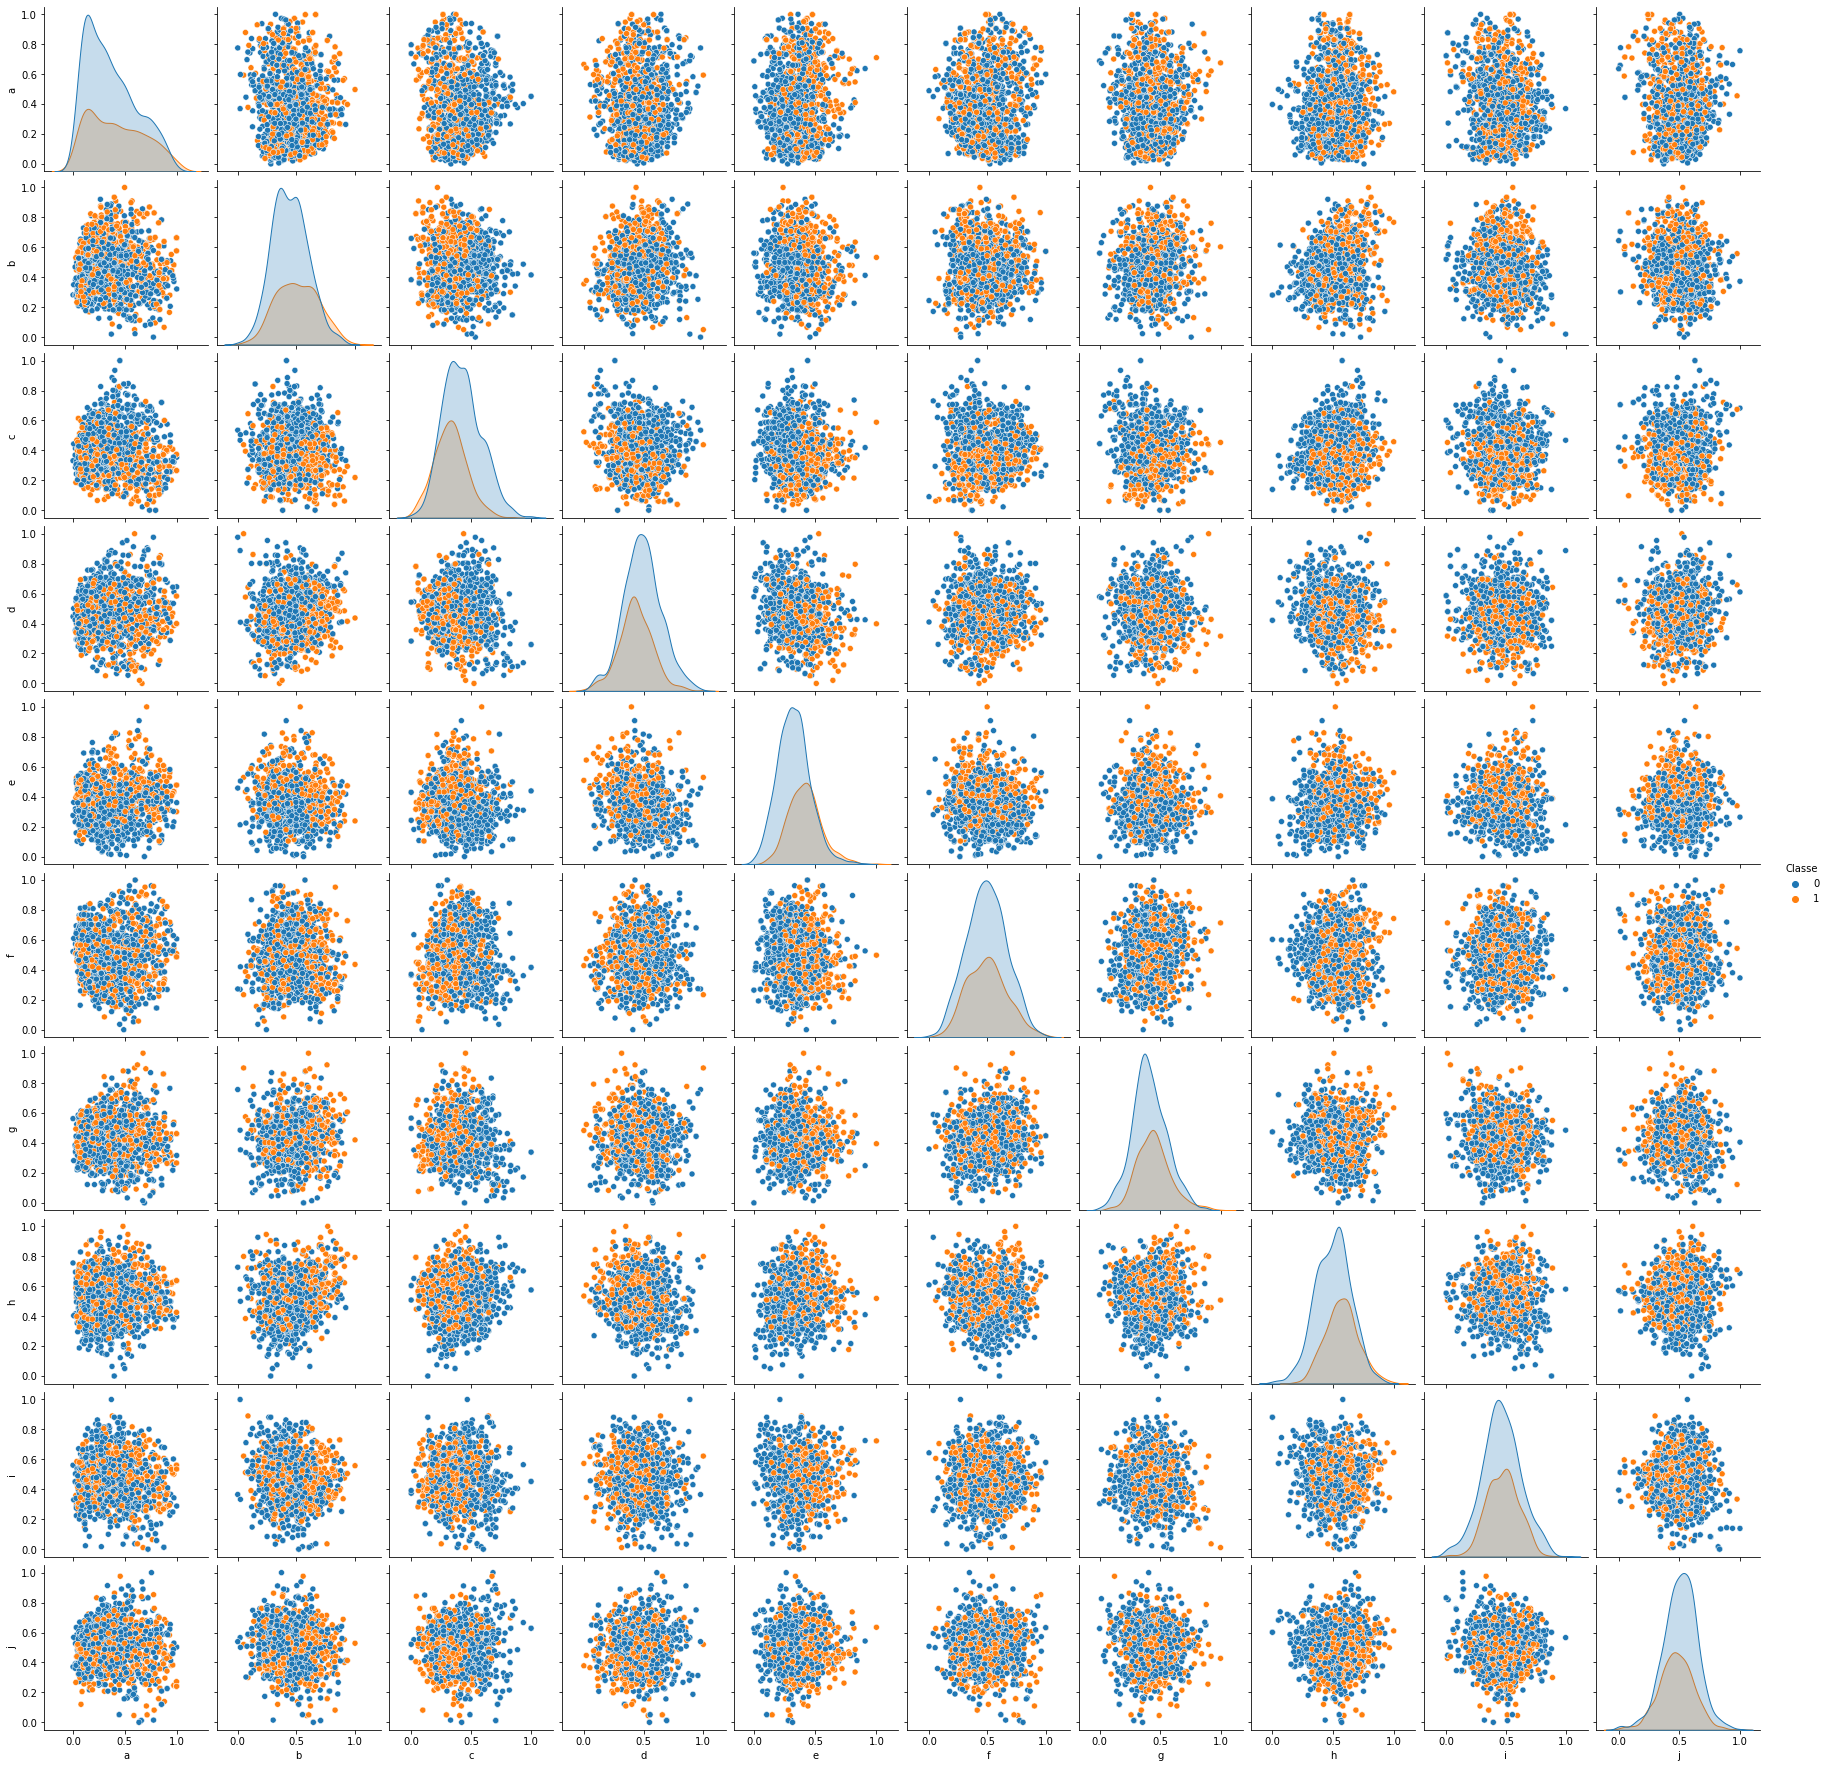

In [17]:
colonnes=["a","b","c","d","e","f","g","h","i","j","Classe"]
fig = plt.figure()
sns.pairplot(data=df[colonnes],hue="Classe")
plt.show()
fig.savefig('correlation_2.png')

Nous pouvons apercevoir que toutes les données sont faiblement corrélées et que celà confirme notre hypothèse d'avant : elles auront toutes plus ou moins le même poids sur la classification d'un individu.

# Algorithme Knn
## 1. Calcul de la distance entre 2 individus :

Afin de calculer les k plus proches voisins entre les individus, j'ai choisi d'utiliser la distance euclidienne pour calculer la proximité des individus.

In [18]:
def euclidean_distance(ind_1, ind_2):
    ''' Calcule la distance euclidienne entre 2 individus'''
    ind_2 = ind_2[:-1] if len(ind_2)==11 else ind_2
    distance = [(a - b)**2 for a, b in zip(ind_1[:-1], ind_2)]
    distance = np.sqrt(sum(distance))
    return distance

## 2. Tri des k- plus proches individus et algorithme principal :

On va comparer la distance entre l'individu étudié et ceux du dataset d'apprentissage.

In [19]:
def operate(k, individu):
    dataset = sorted(learning_df.values.tolist(), key = lambda x : euclidean_distance(x,individu))[:k]
    result=[0,0]
    for i in dataset:
        if i[10]==0:result[0]+=1
        else:result[1]+=1

    return np.argmax(result)

On applique notre algorithme pour un 'k' étudié et on retourne '0' ou '1', ce qui correspond à la Classe estimée de notre individu.
Cette fonction nous permettra par la suite de d'identifier la Classe des individus inconnus.

In [20]:
def knn(k,ind):
    individu_resultat = operate(k,ind)
    return 0 if individu_resultat ==0 else 1

## 3. Précision du modèle et choix du meilleur K

### Précision du modèle :

On implémente le calcul de la matrice de confusion pour retourner la précision de notre modèle.

In [21]:
def accuracy(k,show_matrix=False):
    accu_matrix = [[0,0],[0,0]]
    for ind in test_dataset:
        knn_result = knn(k,ind)
        if ind[10]==0:
            if knn_result  ==0:
                accu_matrix[0][0]+=1
            else :
                accu_matrix[0][1]+=1
        else :
            if knn_result ==1:
                accu_matrix[1][1]+=1
            else :
                accu_matrix[1][0]+=1
    if show_matrix:
        sns.heatmap(accu_matrix,square=True,annot=True,fmt='d',cbar=False)
        plt.show()

    return np.round((accu_matrix[0][0] + accu_matrix[1][1])/len(test_dataset),4)*100

### Choix du meilleur K :

Afin de savoir quel est le meilleur K pour notre dataset, on va tout simplement choisir celui qui nous donne la précision la plus élevée dans notre cas.
Le meilleur 'k' se situe en général entre 20 et 70. Pour plus de marge, on va étudier tous les k entre 15 et 80.

In [22]:
def choose_best_k():
    borne_limite = 75 
    result = [accuracy(i) for i in range(15,80)]
    return np.argmax(result),result[np.argmax(result)],result

In [23]:
def best_k():
    result = choose_best_k()
    return result

In [24]:
graph_k = best_k()

On boucle notre algorithme entre k = 15 et k = 80 pour identifier le meilleur k possible en fonction de la précision retournée par notre algorithme.
Ce k retourné sera le nombre de voisins optimal à sélectionné pour déterminer le type d'un individu de classe inconnue.

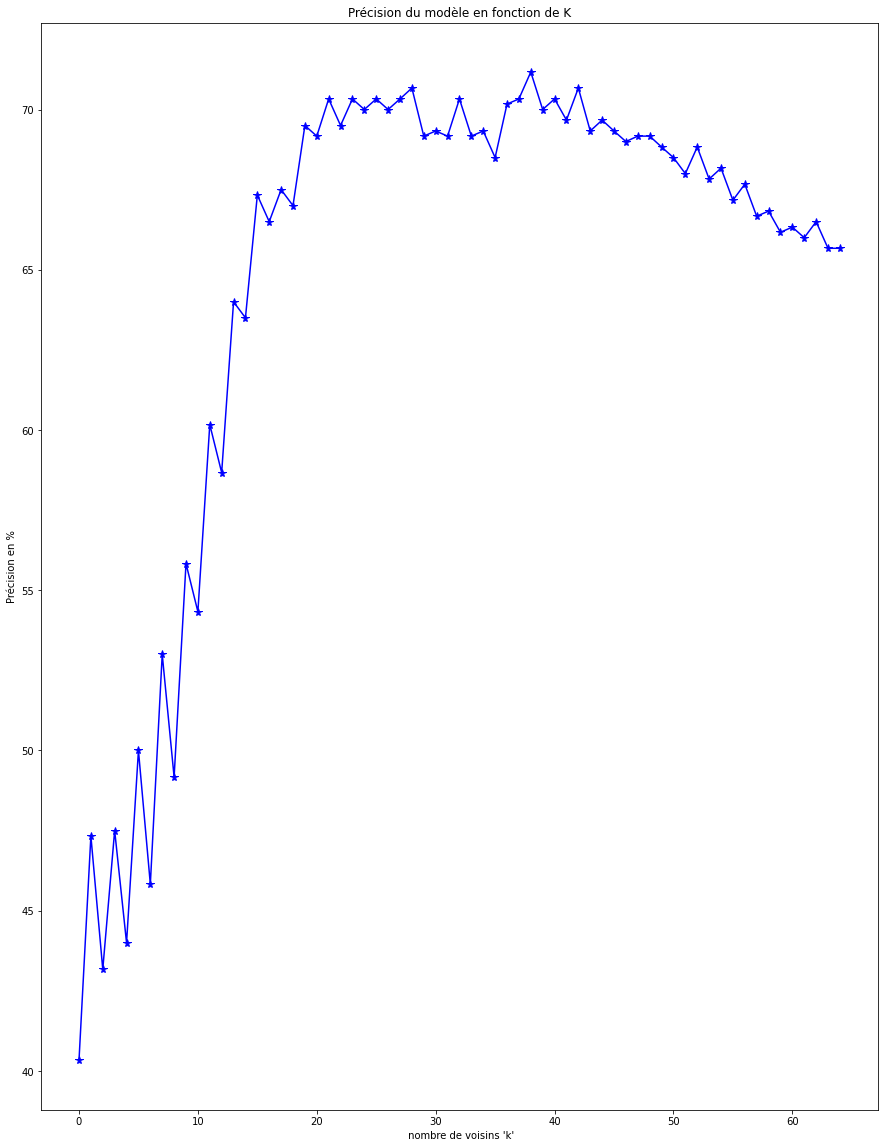

In [25]:
k = [i for i in range(len(graph_k[2]))]
fig = plt.figure()
plt.plot(k, graph_k[2], "-*b", markersize=8)
plt.title("Précision du modèle en fonction de K")
plt.xlabel(" nombre de voisins 'k'")
plt.ylabel("Précision en %")
plt.show()
fig.savefig('show_k.png')

In [26]:
print(f"best k is: {graph_k[0]}; accuracy : {graph_k[1]} %")

best k is: 38; accuracy : 71.17 %


### Quelques détails sur le meilleur modèle
#### Matrice de Confusion du modèle :

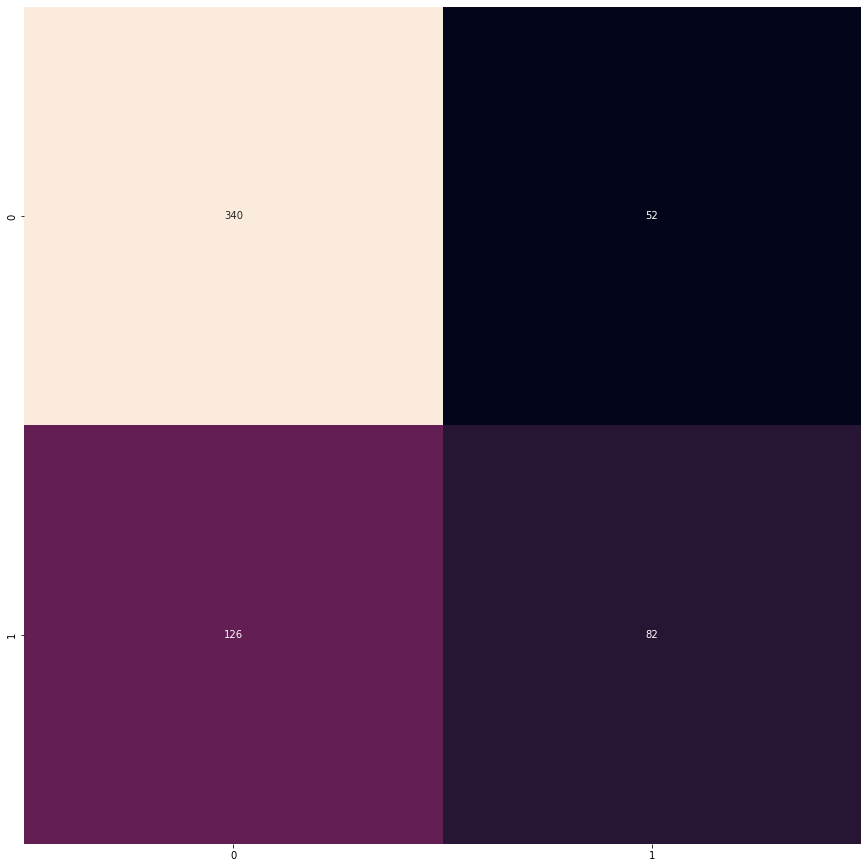

70.33

In [27]:
accuracy(graph_k[0],show_matrix=True)

# Classification de FinalTest.txt

## 1. Initialisation du fichier

In [28]:
df_test = pd.read_csv('http://2.11.7.149/ressources/dia/knn/finalTest.txt', sep=";", header=None)
df_test.columns = ["a", "b", "c", "d", "e", "f", "g", "h", "i" ,"j"]
# On normalise le dataset pour avoir des données de comparaison identiques au modèle.
normalization(df_test)
dataset_final = df_test.values.tolist()

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       1000 non-null   float64
 1   b       1000 non-null   float64
 2   c       1000 non-null   float64
 3   d       1000 non-null   float64
 4   e       1000 non-null   float64
 5   f       1000 non-null   float64
 6   g       1000 non-null   float64
 7   h       1000 non-null   float64
 8   i       1000 non-null   float64
 9   j       1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


## 2. test de chaque individu

Pour chaque individu du fichier 'finalTest.txt', on va déterminer sa classe ('0' ou '1') grâce à l'algorithme KNN avec comme paramètre {k},
le K optimal pour notre modèle trouvé ci-dessus.

In [30]:
final = [knn(graph_k[0],ind) for ind in dataset_final]

In [31]:
#print(final)

## 3. Ecriture du fichier résultat

In [32]:
lignes = [str(i)+"\n" for i in final]
file1 = open("sanchez_groupeH.txt","w")
file1.writelines(lignes)
file1.close()

##### Un fichier de sortie respectant le format indiqué a été créé dans le même répertoire que le notebook

ce notebook est fourni en pdf avec toutes les images chargées afin de servir de rapport. Merci de m'avoir lu.